## DFO Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean

mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

%matplotlib inline

In [2]:
mod_basedir= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
mod_start = dt.datetime(2015,1,1)
mod_end = dt.datetime(2018,1,1)
mod_flen=1
mod_nam_fmt='nowcast'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','vosaline':'grid_T','votemper':'grid_T','e3t':'carp_T','PPDIAT':'dia2_T'}
fdict={'ptrc_T':1,'grid_T':1,'carp_T':1,'dia2_T':24}
data=et.loadDFO(datelims=(mod_start,mod_end)).head(200)

In [3]:
data2=et.matchData(data,filemap, fdict, mod_start, mod_end, mod_nam_fmt, mod_basedir, mod_flen,method='vvlZ',wrapSearch=True,wrapTol=5)

ftype=carp_T, are you sure? (if yes, add to list)
ftype=dia2_T, are you sure? (if yes, add to list)


In [9]:
data2.drop(['mod_e3t'],axis=1,inplace=True)

In [11]:
data2.drop(['indf','ih'],axis=1,inplace=True)

In [12]:
data2.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,ConsT,Z,dtUTC,j,i,mod_nitrate,mod_silicon,mod_vosaline,mod_votemper,mod_PPDIAT
0,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,1.9,NaN,None,None,...,9.859421,1.883998,2015-02-11 11:04:07,322,90,18.074668,36.727672,30.602061,9.502639,NaN
1,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.6,NaN,None,None,...,9.777243,6.544340,2015-02-11 11:04:07,322,90,18.524360,37.353725,30.685959,9.523087,NaN
2,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.7,NaN,None,None,...,9.771987,6.643495,2015-02-11 11:04:07,322,90,18.543223,37.379613,30.689317,9.522316,NaN
3,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,...,9.439995,10.907117,2015-02-11 11:04:07,322,90,19.276532,38.392677,30.822816,9.451342,NaN
4,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,...,9.433733,10.907117,2015-02-11 11:04:07,322,90,19.276532,38.392677,30.822816,9.451342,NaN


In [13]:
mod_basedir= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
mod_start = dt.datetime(2015,1,1)
mod_end = dt.datetime(2018,1,1)
mod_flen=1
mod_nam_fmt='nowcast'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1,'carp_T':1,'dia2_T':24}
data=et.loadDFO(datelims=(mod_start,mod_end)).head(200)
data3=et.matchData(data,filemap, fdict, mod_start, mod_end, mod_nam_fmt, mod_basedir, mod_flen,method='bin',wrapSearch=True,wrapTol=15)

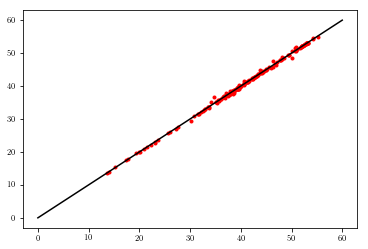

In [16]:
plt.plot(data3['mod_silicon'],data2['mod_silicon'],'r.')
plt.plot((0,60),(0,60),'k-')

In [4]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=np.copy(mesh.variables['tmask'])

In [ ]:
fkeysVar=list(filemap.keys())
ftypes=list(fdict.keys())
# don't load more files than necessary:
for ikey in ftypes:
    if ikey not in set(filemap.values()):
        fdict.pop(ikey)
if len(set(filemap.values())-set(fdict.keys()))>0:
    print('Error: file(s) missing from fdict:',set(filemap.values())-set(fdict.keys()))
ftypes=list(fdict.keys())
# reverse filemap dict
filemap_r=dict()
for ift in ftypes:
    filemap_r[ift]=list()
for ikey in filemap:
    filemap_r[filemap[ikey]].append(ikey)


In [ ]:
filemap_r

In [ ]:
# list model files
flist=dict()
for ift in ftypes:
    flist[ift]=et.index_model_files(mod_start,mod_end,mod_basedir,mod_nam_fmt,mod_flen,ift,fdict[ift])

In [ ]:
ftypes

In [ ]:
fdict

In [ ]:
fdict_r

In [ ]:
data['test']=np.nan
gg=data.groupby(['Year','Month','Day'])
for (Y,M,D),group in gg:
    print(Y,M,D)
    
    for el, r in group.iterrows():
        data.loc[el,['test']]=1

In [ ]:
np.unique(data['test'])

In [ ]:
for Y,grp0 in data.groupby(['Year']):
    print(Y)
    #for (M,D),grp1 in grp0.groupby(['Month','Day']):
        #print(data.loc[grp1.index,['Month']])

In [ ]:
# for now, only match to variables saved at same frequency as e3t
test=fdict_r.copy()
test.pop(pere3t)
if len(test)>0: # loop through and print eliminated variables
    print('Warning: variables excluded because save interval mismatched with e3t:')
    for aa in test:
        for bb in fdict_r[aa]:
            print(filemap_r[bb])
            

In [ ]:
    # so far we have only allowed for 1 file duration for all input files, so all indices equivalent
    # also, we are only dealing with data saved at same interval as e3t

    data['indf'] = [int(flist[ifte3t].loc[(aa>=flist[ifte3t].t_0)&(aa<flist[ifte3t].t_n)].index[0]) for aa in data['dtUTC']]
    t2=[flist[ifte3t].loc[aa,['t_0']].values[0] for aa in data['indf'].values]
    data['ih']=[int(np.floor((aa-bb).total_seconds()/(pere3t*3600))) for aa,bb in zip(data['dtUTC'],t2)]
    # now get appropriate e3t for each set of data points:
    for indf,grp0 in data.groupby(['indf']):
        with nc.Dataset(flist[ifte3t].loc[indf,['paths']].values[0]) as fe3t:
            ff=dict()
            for ift in fdict_r[pere3t]:
                ff[ift]=nc.Dataset(flist[ift].loc[indf,['paths']].values[0])
            for (ih,jj,ii),grp1 in grp0.groupby(['ih','j','i']):
                e3t=fe3t.variables[e3tvar][ih,:,jj,ii][tmask[0,:,jj,ii]==1]
                zs=np.cumsum(e3t)-.5*e3t
                ztar=grp1['Z'].values
                for ift in fdict_r[pere3t]:
                    for ivar in filemap_r[ift]:
                        vals=ff[ift].variables[ivar][ih,:,jj,ii][tmask[0,:,jj,ii]==1]
                        data.loc[grp1.index,['mod_'+ivar]]=np.where(ztar<np.sum(e3t),np.interp(ztar,zs,f2),np.nan)
            for ift in fdict_r[pere3t]:
                ff[ift].close()


In [ ]:
flist

In [ ]:
def _interpZe3t(data,flist,ftypes,filemap_r,gridmask,fdict):
